# Multiple Linear Regression - Exercise

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size_year.csv'. 

You are expected to create a multiple linear regression (similar to the one in the lecture), using the new data. 

In this exercise, the dependent variable is 'price', while the independent variables are 'size' and 'year'.

Good luck!

## Import the relevant libraries

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

## Load the data

In [2]:
df = pd.read_csv("data/raw/real_estate_price_size_year.csv")

In [3]:
print(df.columns)
df.describe()

Index(['price', 'size', 'year'], dtype='object')


,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   100 non-null    float64
 1   size    100 non-null    float64
 2   year    100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


## Create the regression

### Declare the dependent and the independent variables

In [5]:
y = df["price"]
x1 = df[["size", "year"]]

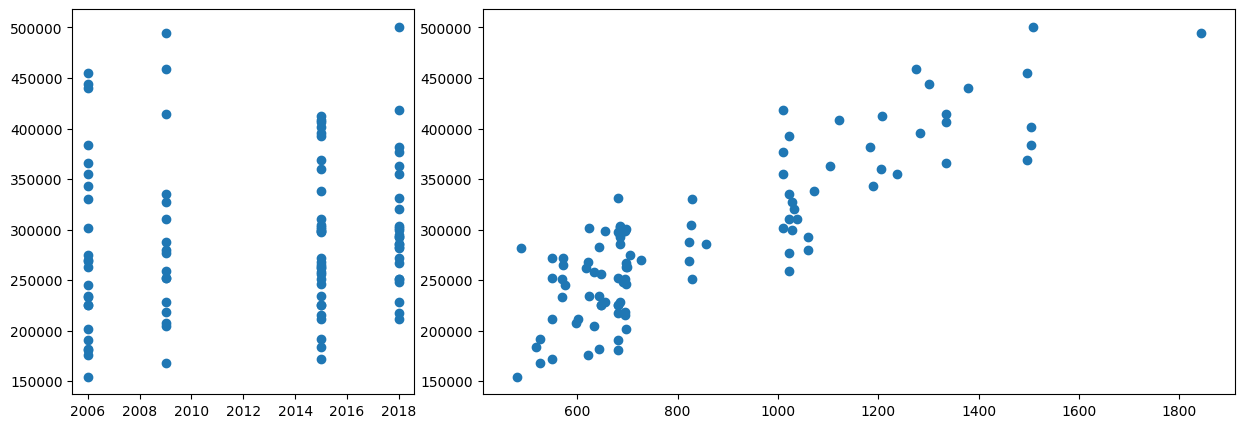

In [6]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(x1["year"], y)
plt.subplot(1, 3, (2, 4))
plt.scatter(x1["size"], y)
plt.show()

### Regression

In [9]:
X = sm.add_constant(x1)
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     168.5
Date:                Mon, 18 Aug 2025   Prob (F-statistic):           2.77e-32
Time:                        21:28:49   Log-Likelihood:                -1191.7
No. Observations:                 100   AIC:                             2389.
Df Residuals:                      97   BIC:                             2397.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.772e+06   1.58e+06     -3.647      0.000   -8.91e+06   -2.63e+06
size         227.7009     12.474     18.254      0.000     202.943     252.458
year        2916.7853    785.896      3.711      0.000    1357.000    4476.571
==============================================================================
Omnibus:                       10.083   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                3.678
Skew:                           0.095   Prob(JB):                        0.159
Kurtosis:                       2.080   Cond. No.                     9.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""